<a href="https://colab.research.google.com/github/mariammaher550/text-classification-naive-bayes/blob/main/text_classification_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

data = pd.read_csv("items_cat_processed_data.csv")
text=[]
target=[]
categories  = []
cleared_uk = []
titles_uk = []
for i in range(27):
  categories.append(i)

for i in range(data.shape[0]):
  text.append(str(data['title'][i]))
  target.append(data['label'][i])

data = pd.read_csv('400_items_processed_data.csv')

for i in range(data.shape[0]):
  text.append(str(data['title'][i]))
  target.append(data['label'][i])

data = pd.read_csv('unknown.csv')

for i in range(data.shape[0]):
  cleared_uk.append(str(data['clear'][i]))
  titles_uk.append(str(data['title'][i]))



In [9]:
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.33)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, np.array(y_train))
labels = model.predict(X_test)

Text(91.68, 0.5, 'predicted_label')

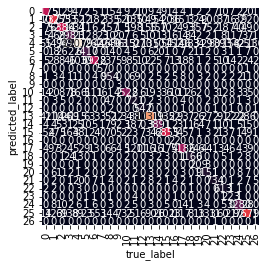

In [10]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=categories, yticklabels=categories)
plt.xlabel('true_label')
plt.ylabel('predicted_label')

In [23]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6492
           1       0.83      0.91      0.87      8078
           2       0.83      0.90      0.86      7131
           3       0.90      0.70      0.78      4283
           4       0.73      0.94      0.82     13843
           5       0.95      0.93      0.94      2601
           6       0.92      0.91      0.92      6487
           7       0.98      0.10      0.19       557
           8       0.87      0.43      0.57      2244
           9       1.00      0.01      0.02       373
          10       0.88      0.84      0.86      5386
          11       0.91      0.45      0.60      1605
          12       0.99      0.61      0.75       891
          13       0.86      0.96      0.91     10841
          14       0.88      0.91      0.90      4260
          15       0.91      0.93      0.92      7373
          16       1.00      0.07      0.14       299
          17       0.89    

In [26]:
predictions = []
cat = pd.read_csv('category.csv')
for product in cleared_uk:
  i = model.predict([product])
  predictions.append(cat.iloc[i[0],1])

In [27]:
for i in range(len(predictions)):
  print(f"{titles_uk[i]} {predictions[i]}")

КУЛИ ТРОЙКА Б. Кафе
Пакет-майка ПНД 28*50+15 16мк с логотипом Аллея; 3000 Упаковка
ЗЕЛПМ-КА32Х62Х17 Для дома
Пакет ЛЕНТА майка 9кг Упаковка
Оплата проезда, класс ТС:1, тариф: полны Услуги
Услуги связи Услуги
СТОИМ. Для дома
3300573 Пакет ПЯТЕРОЧКА 65х40см Упаковка
Агентская комиссия Для дома
АИ-92-К5 Авто
Итого к оплате Бакалея
Кукуруза ЛЕНТА 425мл Овощи и фрукты
Лук Эконом вес 1кг Овощи и фрукты
Бананы вес 1кг Овощи и фрукты
Морковь Эконом вес 1кг Овощи и фрукты
Пакет ЛЕНТА майка 12кг Упаковка
Аи-92 Авто
САМЛА кнт Для дома
Эчпочмак 100гр Для дома
Пакет майка белая 39х65 23 мкр БОЛЬШАЯ Упаковка
МЯСНОЙ ХЛЕБ ПО БАВАР Гастрономия
РАЗОВЫЙ ПОЛНЫЙ Для дома
Полный билет Услуги
ПАКЕТ-МАЙКА ДИКСИ ПНД 12КГ Упаковка
Пакет ТХ Лотос с логотипом Упаковка
Пакет-майка Сезон большой Упаковка
ТРК №2 Бензин автомобильный АИ-95-К5 Авто
Биг Кинг экстра Бакалея
Молоко ультрапастер. "Тяжин" 2,5% ГОСТ, 1л. Молочные продукты
#Ява Белое Золото Ориг. Алкоголь
ТРК-5 СУГ Авто
809 Бананы 1кг Овощи и фрукты
Шефбурге

In [28]:
dictionary = {'title': titles_uk, 'category': predictions}

df = pd.DataFrame(dictionary)

df.to_csv("predictions.csv")